***
***
# Prediction of Employee Attrition on IBM HR (Kaggle) Dataset
***
***
This notebook is designed to teach students at my machine learning and pattern recognition course the following concepts:
- Design an end-to-end machine learning pipeline
- Perform EDA to discover more about data
- Apply different approach to deal with data imbalance
- Do the model selection and model evaluation for different algorithms
- Understand different kinds of widely applied algorithms and their tradeoffs
- Recognize and avoid overfitting/underfitting 



# Table of Contents


## Part 1- Define
- [1 The Problem](#problem)
- [2 Dataset](#dataset)

## Part 2- Discover
- [1 Load the data](#load)
- [2 Clean the data](#clean)
- [3 Explore the data (EDA)](#eda)
- [4 Establish a baseline](#baseline)
- [5 Hypothesize solutions](#solution)

## Part 3- Develop
- [1 Create pipelines and score based on balanced accuracy](#pipeline)
- [2 Model selection and evaluation using nested cross-validation](#nestedcv)
- [3 Select best model](#best)

## Part 4- Deploy
- [ Save model](#save)
***




# Part 1- Define
### ----  1 The Problem ---- <a class="anchor" id="problem"></a>
Attrition is a problem that can impact all businesses. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff, and training new staff. Therefore, it is crucial to understand the drivers to minimize staff attrition. In this context, we can use binary classification algorithms to predict attrition, and HR can find remedies to prevent it as possible. In this project, I predict attrition in the IBM HR Analytics Employee Attrition & Performance dataset on Kaggle. The dataset is imbalanced and I show that how balancing improve the performance.

### ---- 2 Dataset ---- <a class="anchor" id="dataset"></a>
The dataset includes the following features: 
- I) Personal(Demographic) Characteristics: Age, Gender, Marital Status, Education, Distance from Home
- II) Job·Vocational behavior Characteristic: Department, Job Role/Job Level, Working Years at Company, Number of Worked Company, Total Working Years, Average Working Years at Each Company
- III) Extrinsic Reward: Monthly Income, Stock Option Level, Percent of Salary Hike, Performance Rating, Years Since Last Promotion
- IV) Intrinsic Motivation (These factor can prevent empolyee's resignation): Job Involvement, Job Satisfaction, Relationship Satisfaction, Environment Satisfaction, Traing Times, Work-Life Balence, Years In Current Role





In [76]:
__author__ = "Ellie Sherafat"
__email__ = "e.sherafat@gmail.com"

# Import libraries
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from  collections import Counter

# Preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.decomposition import PCA

# CLassification & pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bootstrap_point632_score
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection
from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve
from sklearn.metrics import balanced_accuracy_score

# Imblearn
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced

***
# Part 2- Discover <a class="anchor" id="discover"></a>
### ---- 1 Load the data ---- <a class="anchor" id="load"></a>


In [2]:
#load the data into a Pandas dataframe
data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

***
### ----  2 Clean the data ---- <a class="anchor" id="clean"></a>
- Look at the shape and distribution of the data
- Look for duplicate data, invalid data (negative values for income), and remove them

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info() # -> 9 categorical features, 'Attrition' is the target class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
data.shape

(1470, 35)

In [6]:
data.duplicated().sum() # -> No duplicates

0

***
### ---- 3 Explore the data (EDA) ---- <a class="anchor" id="eda"></a>
- Summarize each feature
- Summarize the target variable and check the class imbalance
- Check if there are missing values
- Remove irrelevant features and the one with same values in all rows
- Look for correlation between each feature and the target
- Look for correlation between features

In [7]:
# Summarize features
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
# Summarize the target variable
data['Attrition'].unique()  

array(['Yes', 'No'], dtype=object)

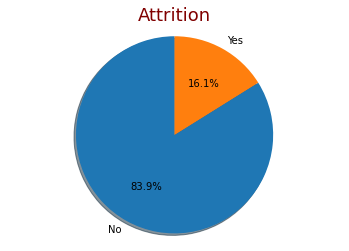

In [9]:
fig, ax = plt.subplots()
ax.pie(data["Attrition"].value_counts() ,labels=["No","Yes"], 
       autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title("Attrition",fontsize=18,color='maroon')
plt.show()

#data.groupby('Attrition').size().plot(kind = 'pie', autopct= '%.2f')


In [10]:
# Print the class imbalanced ratio
classes_count = data['Attrition'].value_counts()
print('Class 0:', classes_count[0])
print('Class 1:', classes_count[1])
print('Proportion:', round(classes_count[0] / classes_count[1], 2), ': 1')
#classes_count.plot(kind='bar', title='Count (class)')

Class 0: 1233
Class 1: 237
Proportion: 5.2 : 1


In [11]:
# Check if there are missing values
data.isnull().sum() # -> No missing values
# We do not have any missing values here, but in general whenever we have missing values within a feature,
# we want to understand whether those values are missing at random,
# for instance if it was never reported for certain people, 
# or if it's missing in a systematic way,
# for instance they didn't ask the age of anybody in a specific department.
# That will inform how we handle these missing values. 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
# Remove irrelevant features and the one with same values in all rows
data = data[[i for i in data if len(set(data[i]))>1]]  # -> 'EmployeeCount', 'Over18', 'StandardHours'
data.drop(columns = ['EmployeeNumber'], inplace = True) # -> Irrelevant, it is only an employee identifier

In [13]:
# How workers who quit behave?
data[data['Attrition'] == 'Yes'].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
data[data['Attrition'] == 'No'].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### A short analysis reveals the following key points:

For people who leave the company (on average):

- They are younger: 33 years
- They live further from their work: 11km
- Less satisfaction with the work environment: 2
- Lower level of work: 1
- Less satisfaction with work: 2
- Lower monthly salary: $4800.00
- Work more overtime: 0.5
- Less years in the company: 5
- Fewer years in current position: 2
- Fewer years with current manager: 2.8

####  Which features can be a strong indicators of sombody attrition?

Inspired by "Top 10 Reasons Why Employees Quit Their Jobs" written by Susan Heathfield, explains in her article, I'll focuse on several reasons including the relationship between relation with the boss, bored and unchallenged, relationships with coworkers, salary, overtime and employee attrition. Corresponding features would be: 

- Relation with the boss: We do not have a feature that qualifies the relationship, but the "YearsWithCurrManager" quantifies that
- Bored and Unchallenged by the Work: "JobSatisfaction" can indicate if employees enjoy their job
- Relationships With Coworkers: "JobSatisfaction" range can be a good overall indicator 
- Salary and attrition: 'MonthlyIncome'
- Overtime and attrition: Burnout can be generated by 'OverTime'

We look at categorical and numerical values separately to find out the relationships

In [15]:
# Separate categorical and numerical features, explore, plot, and clean them 
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [16]:
categorical_data.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [17]:
numeric_data['Attrition']= data['Attrition']
numeric_data.head()
numeric_data.groupby('Attrition').mean()


C:\Users\Eli\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


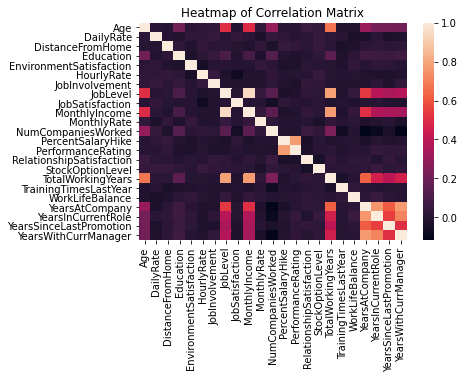

In [18]:
# Correlation matrix. What features correlate the most with attrition? What other correlations?
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

In [19]:
#numeric_data.columns
continues_features = ['Age', 'DailyRate', 
       'HourlyRate','MonthlyIncome',
       'MonthlyRate',  
       'TotalWorkingYears', 
       'YearsAtCompany'
       ]

ordinal_features = ['Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
                    'DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear',
                    'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager'
                   ]

C:\Users\Eli\Anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


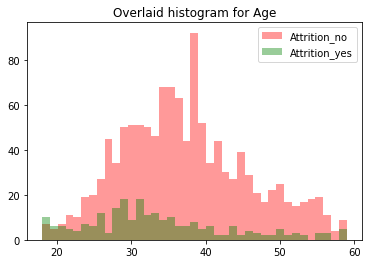

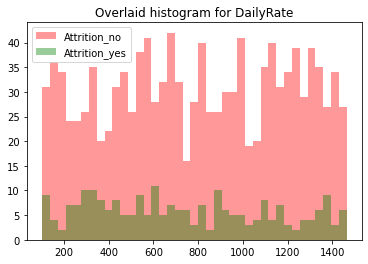

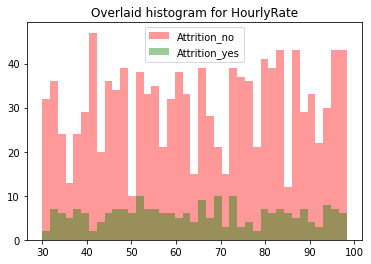

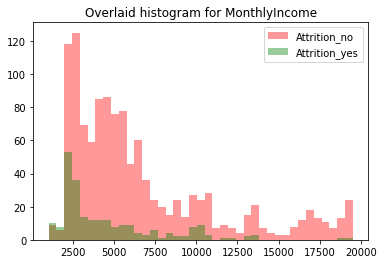

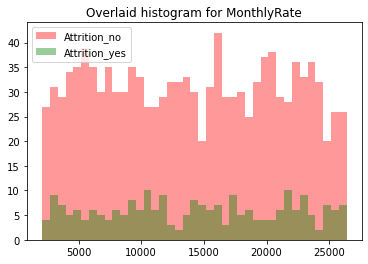

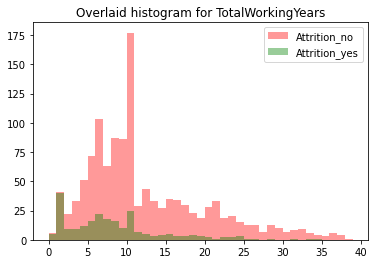

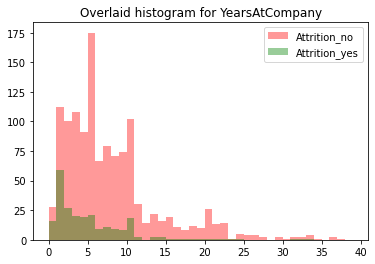

In [20]:

for i in continues_features:
    Attrition_no = list(data[data['Attrition'] == 'No'][i].dropna())
    Attrition_yes = list(data[data['Attrition'] == 'Yes'][i].dropna())
    xmin = min(min(Attrition_no), min(Attrition_yes))
    xmax = max(max(Attrition_no), max(Attrition_yes))
    width = (xmax - xmin) / 40
    sns.distplot(Attrition_no, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(Attrition_yes, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Attrition_no', 'Attrition_yes'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

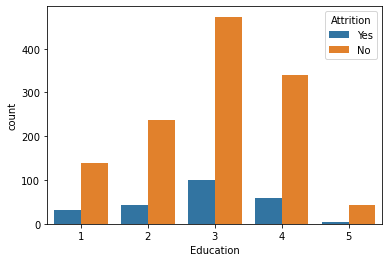

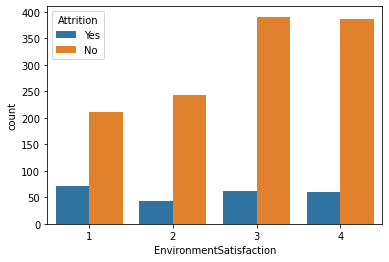

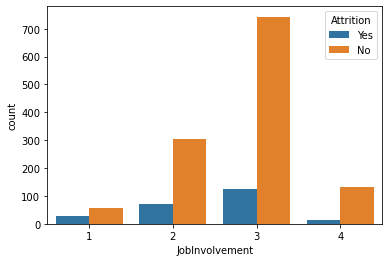

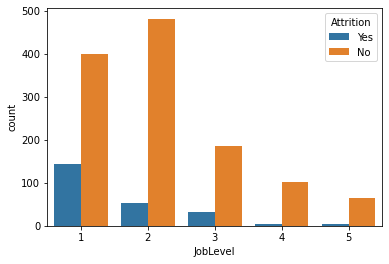

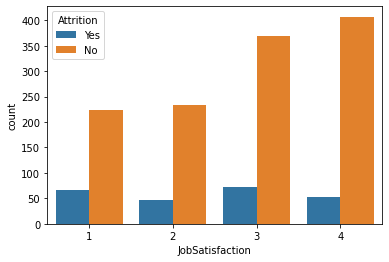

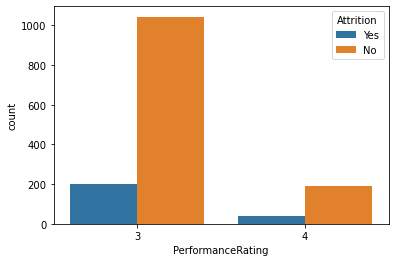

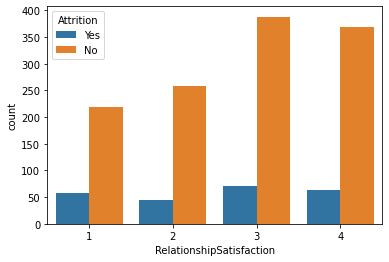

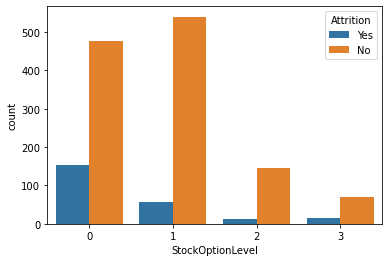

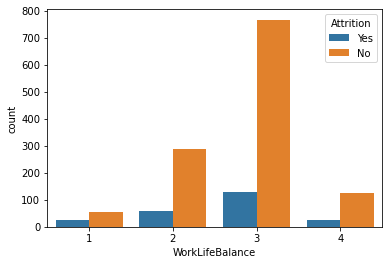

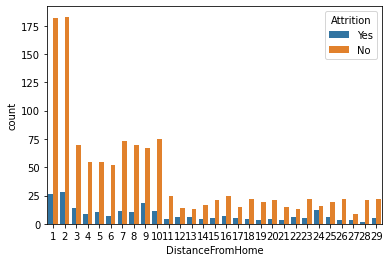

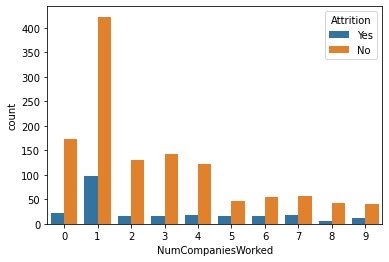

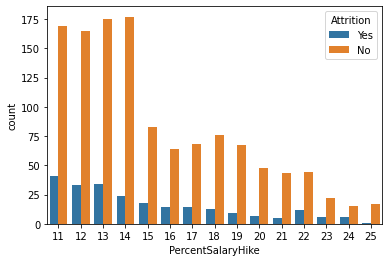

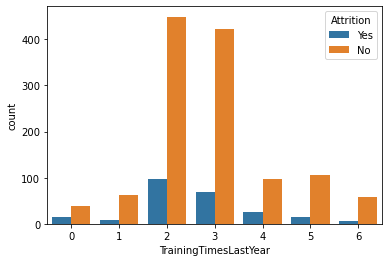

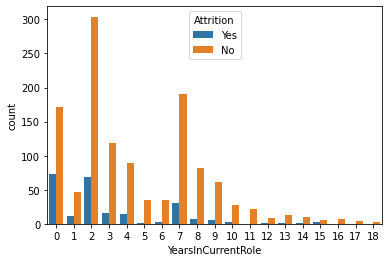

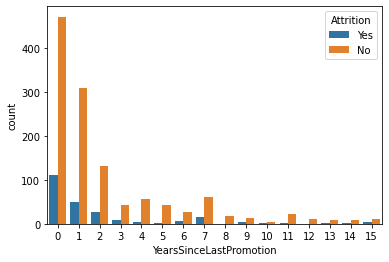

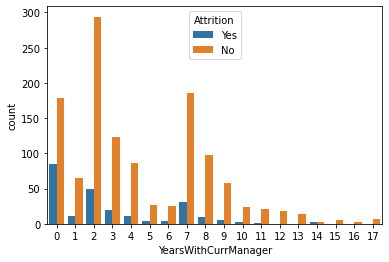

In [21]:

for i, col in enumerate(ordinal_features):
    plt.figure(i)
    #sns.catplot(x=col, y='Attrition', data=numeric_data, kind='point', aspect=2,)
    sns.countplot(x=col, hue='Attrition',data = data)


Text(0.5, 1.0, 'Education Field Counts')

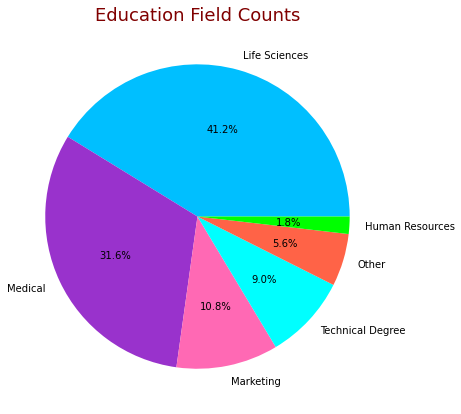

In [22]:
labels = data.EducationField.value_counts().index
sizes = data.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=["deepskyblue","darkorchid","hotpink","cyan","tomato","lime"],autopct="%1.1f%%")
plt.title("Education Field Counts",fontsize=18,color='maroon')

# --> EducationField : The workers with Human Resources and Technical Degree are more likely to quit than
# employees from other fields 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

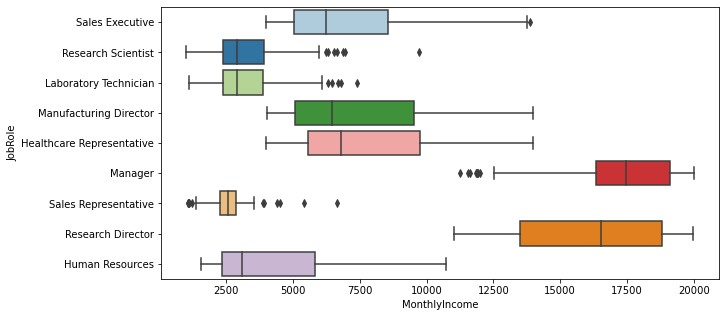

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=data, palette='Paired')

#### EDA summary
- Most people that left the company are in the Sales and Laboratories departments (Sales Executives and Lab Technicians).
- Most people leaving the company are single
- The higher the job level, the less likely is for an employee to leave the company
- Sales representative have the lowest range of salaries while Managers and Research Directors have salaries in the highest ranges
- We found relationships between some features and the employee's attrition, but in fact several of them may led to an employee to resign.
- The dataset is imbalanced, it should be considered in the modeling
***
### ---- 4 Establish a baseline ---- <a class="anchor" id="baseline"></a>
We always want to compare our performance with a baseline. Here, we use a dummy classifer which always predicts the majority class independent of the features, as a baseline. Furthermore, we can consider random forest with default parameter as baselines as well.

***
### ---- 5 Hypothesize solutions ---- <a class="anchor" id="solution"></a>

In this section, we implement several approaches to deal with class imbalance and compare them with baseline models. Notice that accuracy is not a good performance measure in the imabalance setting. Therefore, we compare several metrics which take into account the balancing issue, such as balanced_accuracy and geomertic_mean.


#### 1) Weighted methods
The class_weight="balanced" in LR and RF models penalize a false classification from the minority and majority class differently to fight with the imbalance issue. 
#### 2) Resampling techniques
We can resample the training set by under-sampling or over-sampling some of the samples and then pass the balanced set to the classifier
#### 3) Bagging and Ensemble methods
BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier, RUSBoostClassifier

#### 4) Balanced Random Forest and Balance Bagging

***
## Part 3 - DEVELOP <a class="anchor" id="develop"></a>
In this part, I implement baseline models, and also some models from the four approaches mentioned above. The modeling part includes several components:
- Feature engineering and selection
- Model selection 
- Hyperparameter tunning
- Model evaluation

In [24]:
# Add new features
data['Age_bin'] = pd.cut(data['Age'], [18, 25, 35, 45, 55, 60], labels=['18-25', '25-35', '35-45','45-55','55-60'])
data['dist_bin'] = pd.cut(data['DistanceFromHome'], [0, 3, 7, 11, 15, 20, 29], 
                          labels = ['1-3','3-7','7-11','11-15','15-20','20-29'])
data['monthIncome_bin'] = pd.cut(data['MonthlyIncome'], [1000,2400,3200,4800, 5200, 5900, 6800, 8800, 20000],
                                labels = [1,2,3,4,5,6,7,8])
data['jobLevel_bin'] = pd.cut(data['JobLevel'], [0,2,5], labels =['lower','higher'])
data['TotalSatisfaction'] = data['JobSatisfaction'] + data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction']


***
### ----  1 Create pipelines and score based on balanced accuracy ---- <a class="anchor" id="pipeline"></a>

In [25]:
# This function evaluates the performance of the given model and store it in a dataframe
def evaluate_classifier(clf, df_scores, clf_name=None):
    from sklearn.pipeline import Pipeline
    if clf_name is None:
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__
    acc = clf.fit(X_train, y_train).score(X_test, y_test)
    y_pred = clf.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    performance = classification_report_imbalanced(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc] + list(map(float,performance.split('\n')[5].split()[3:8]))},
        index=['Accuracy', 'Balanced accuracy', 'Precision','Recall', 'Specificity', 'F1', 'Geometric mean']
    )
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores



In [26]:
# This function evaluates the balanced accuracy of the given model and store it in a dataframe
def CV_balanced_acc(clf, df_scores, clf_name=None):
    if clf_name is None:
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__
  
    scores = cross_val_score(estimator = clf,
                             X = X_train, 
                             y = y_train,
                             cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                             scoring = 'balanced_accuracy',
                             n_jobs = -1)
    
    bal_acc = str(round(scores.mean() * 100, 2)) + ' +/- ' + str(round(scores.std() * 100, 2))
    clf_score = pd.DataFrame(
        {clf_name: [bal_acc]},
        index=['Balanced accuracy']
    )
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores    

In [27]:
############## Define an empty dataframe to store the results
df_scores = pd.DataFrame()

y = data['Attrition'] == 'Yes'
X = data.drop('Attrition', axis=1)

In [29]:


############## Split data into training and test (validation), stratify since the data is imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.25, random_state=42)

'''
############## Preprocessing 
# Apply one-hot encoding to the categorical columns and standardize the numerical columns 
num_pipe = make_pipeline(StandardScaler())
cat_pipe_1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cat_pipe_2 = make_pipeline(OrdinalEncoder())

numeric_features = selector(dtype_include = np.number)
categorical_features = selector(dtype_include = pd.CategoricalDtype)

preprocessor_linear = ColumnTransformer(
    [('numericals', num_pipe, numeric_features),
     ('categoricals', cat_pipe_1, categorical_features )],
    n_jobs=2
)

preprocessor_tree = ColumnTransformer(
    [('numericals', num_pipe, numeric_features),
     ('categoricals', cat_pipe_2, categorical_features)],
    n_jobs=2
)
'''

categorical_features = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# No need to scale the numerical data for tree based models, we only need to ordinal encode the categorical data
categorical_transformer_tree = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('ordhot', OrdinalEncoder())
    ]
)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

preprocessor_tree = ColumnTransformer(
    [
        ('categoricals', categorical_transformer_tree, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# DUMMY CLASSIFIER
dummy_clf = DummyClassifier(strategy='most_frequent')

# LOGISTIC REGRESSION
lr_clf = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000)
)

# RANDOM FOREST
rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

for clf, name in zip((dummy_clf, lr_clf, rf_clf),
                     ('Dummy','LR','RF')):
    df_scores = CV_balanced_acc(clf, df_scores, name)
    
print('*** Performance of the baseline models + other 4 approaches ***')
df_scores

*** Performance of the baseline models + other 4 approaches ***


,Dummy,LR,RF
Balanced accuracy,50.0 +/- 0.0,69.15 +/- 3.34,59.72 +/- 3.92


In [30]:
# LOGISTIC REGRESSION with CLASS WEIGHT
lr_clf.set_params(logisticregression__class_weight='balanced')

# RANDOM FOREST with CLASS WEIGHT
rf_clf.set_params(randomforestclassifier__class_weight='balanced')

# LOGISTIC REGRESSION with UNDER_SAMPLING
pipe1 = make_pipeline_with_sampler(
    preprocessor,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000)
)

# RANDOM FOREST with UNDER_SAMPLING
pipe2 = make_pipeline_with_sampler(
    preprocessor_tree,
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2)
)

# BALANCED RANDOM FOREST
pipe3 = make_pipeline(
    preprocessor_tree,
    BalancedRandomForestClassifier(random_state=42, n_jobs=2)
)

# BALANCED BAGGING with GRADIANT BOOSTING
pipe4 = make_pipeline(
    preprocessor_tree,
    BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=12),
        n_estimators=100, random_state=12, n_jobs=2
    )
)

# EASY ENSEBMLE with ADABOOST
pipe5 = make_pipeline(
    preprocessor_tree,
    EasyEnsembleClassifier(
        base_estimator= AdaBoostClassifier(random_state=12),
        n_estimators=100, random_state=12, n_jobs=2
    )
)

# RUSBOOST 
pipe6 = make_pipeline(
    preprocessor_tree,
    RUSBoostClassifier(
        base_estimator= AdaBoostClassifier(random_state=42),
        n_estimators=100, random_state=42)
)

# LOGISTIC REGRESSION with SMOTE
pipe7 = make_pipeline_with_sampler(
    preprocessor,
    SMOTE(random_state=42, k_neighbors = 9),
    LogisticRegression(max_iter=1000)
)

# SVM with SVMSMOTE
pipe8 = make_pipeline_with_sampler(
    preprocessor,
    SVMSMOTE(sampling_strategy='minority',random_state=123),
    svm.SVC(kernel='linear', decision_function_shape='ovo', probability=True)
)


for clf, name in zip((lr_clf, rf_clf, pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7, pipe8),
                     ('LR with class weight','RF with class weight','LR with under-sampling','RF with under-sampling',
                     'Balanced RF','Balanced bagging','EasyEnsemble','RUSBoost','LR with SMOTE','SVM with SVMSMOTE')):
    df_scores = CV_balanced_acc(clf, df_scores, name)
    
print('*** Performance of the baseline models + other 4 approaches ***')
df_scores

*** Performance of the baseline models + other 4 approaches ***


,Dummy,LR,RF,LR with class weight,RF with class weight,LR with under-sampling,RF with under-sampling,Balanced RF,Balanced bagging,EasyEnsemble,RUSBoost,LR with SMOTE,SVM with SVMSMOTE
Balanced accuracy,50.0 +/- 0.0,69.15 +/- 3.34,59.72 +/- 3.92,74.56 +/- 3.94,56.56 +/- 2.48,74.31 +/- 3.13,72.3 +/- 2.39,69.75 +/- 3.59,74.1 +/- 3.44,72.76 +/- 4.33,75.08 +/- 2.48,73.62 +/- 3.4,73.26 +/- 2.8


#### Summary
As you see, all of the suggested approaches improve the balanced accuracy up to %20 compared to the baselines. That was expected since all the approaches somehow take the data imbalance into account. 

***
### ---- 2  Model selection and evaluation using nested cross-validation ---- <a class="anchor" id="nestedcv"></a>

There are tones of models and settings that can be tested. Here, I select couple methods with highest average balanced accuracy above (LR with SMOTE and Balanced bagging), and use nested CV for algorithm comparision and find the best model selection and evalution.

Note that in model selection, we should tune hyper parameters and look at the validation and learning curves to check on overfitting. We can fight overfitting/underfitting in different ways depend on the selected algorithm. 

In [57]:
''''''
############## Split data into training and test (validation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.25, random_state=42)


# Initializing Classifiers
clf1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier(random_state=1)
clf4 = SVC(random_state=1)
clf5 = RandomForestClassifier(random_state=1)
clf8 = svm.SVC(kernel='linear', decision_function_shape='ovo', probability=True)
clf6 = RUSBoostClassifier(
        base_estimator= AdaBoostClassifier(random_state=42),
        random_state=42)

pipe1 = Pipeline([('preprocessing', preprocessor),
                  ('smpl',SMOTE(random_state=42)),
                  ('std', StandardScaler()),
                  ('clf1', clf1)])

pipe2 = Pipeline([('preprocessing', preprocessor),
                  ('smpl',SMOTE(random_state=42)),
                  ('std', StandardScaler()),
                  ('clf2', clf2)])

pipe4 = Pipeline([('preprocessing', preprocessor),
                  ('smpl',SMOTE(random_state=42)),
                  ('std', StandardScaler()),
                  ('clf4', clf4)])

pipe6 = Pipeline([('preprocessing', preprocessor_tree),
                  ('clf6', clf6)])

# SVM with SVMSMOTE
pipe8 = Pipeline([('preprocessing', preprocessor),
                  ('smpl',SVMSMOTE(random_state=123)),
                  ('std', StandardScaler()),
                  ('clf8', clf8)])


# Setting up the parameter grids
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-2, 2))}]

param_grid2 = [{'clf2__p': [1, 2]}]

param_grid3 = [{'max_depth': list(range(1, 10)) + [None],
                'criterion': ['gini', 'entropy']}]

param_grid4 = [{'clf4__kernel': ['rbf'],
                'clf4__C': np.power(10., np.arange(-2, 2)),
                'clf4__gamma': np.power(10., np.arange(-3, -1))},
               {'clf4__kernel': ['linear'],
                'clf4__C': np.power(10., np.arange(-2, 2))}]

param_grid5 = [{'n_estimators': [10, 100, 500, 1000, 10000]}]

param_grid6 = [{'n_estimators': [100, 500]}]
                                 
param_grid8 = [{'smpl__sampling_strategy': ['minority','majority']}]


In [66]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle = True, random_state=1)

for pgrid, est, name in zip((param_grid1, param_grid8),
                            (pipe1, pipe8),
                            ('Softmax','SVM')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='balanced_accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [67]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train, 
                                   y=y_train, 
                                   scoring='balanced_accuracy',
                                   cv=outer_cv,
                                   n_jobs=-1)
    print('%s | outer Bal_ACC %.2f%% +/- %.2f' % 
          (name, nested_score.mean() * 100, nested_score.std() * 100))

SVM | outer Bal_ACC 75.25% +/- 3.54
Softmax | outer Bal_ACC 75.09% +/- 4.22


***
### ----  3 Select best model  ---- <a class="anchor" id="best"></a>
Determine the best algorithm from the experiment above and tune hyperparameters for the best model 

In [68]:
gcv_model_select = GridSearchCV(estimator=pipe1,
                                param_grid=param_grid1,
                                scoring='balanced_accuracy',
                                n_jobs=-1,
                                cv=inner_cv,
                                verbose=1,
                                refit='balanced_accuracy')

gcv_model_select.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categoricals',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['BusinessTravel', 'Department', 'Education...
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Tot

In [69]:
best_model = gcv_model_select.best_estimator_

train_acc = balanced_accuracy_score(y_true=y_train, y_pred=best_model.predict(X_train))
test_acc = balanced_accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test))

print('Accuracy %.2f%% (average over k-fold CV test folds)' %
      (100 * gcv_model_select.best_score_))
print('Best Parameters: %s' % gcv_model_select.best_params_)

print('Training Accuracy: %.2f%%' % (100 * train_acc))
print('Test Accuracy: %.2f%%' % (100 * test_acc))



Accuracy 75.20% (average over k-fold CV test folds)
Best Parameters: {'clf1__C': 0.1, 'clf1__penalty': 'l2'}
Training Accuracy: 79.81%
Test Accuracy: 72.42%


In [70]:
df_scores2 = pd.DataFrame()
df_scores2 = evaluate_classifier(dummy_clf, df_scores2, 'Dummy')
df_scores2 = evaluate_classifier(rf_clf, df_scores2, 'RF')
df_scores2 = evaluate_classifier(best_model, df_scores2, 'Best model')
df_scores2

C:\Users\Eli\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dummy,RF,Best model
Accuracy,0.84,0.840,0.802
Balanced accuracy,0.50,0.548,0.724
Precision,0.71,0.800,0.840
Recall,0.84,0.840,0.800
Specificity,0.16,0.260,0.650
F1,0.77,0.800,0.820
Geometric mean,0.00,0.340,0.720


Text(0.5, 1.0, 'ROC Graph for the best model vs baseline')

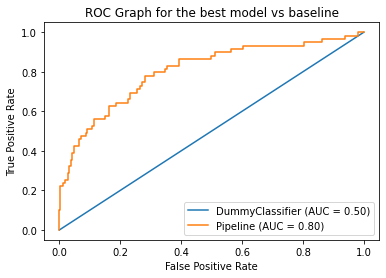

In [71]:
classifiers = [dummy_clf, best_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.title('ROC Graph for the best model vs baseline')

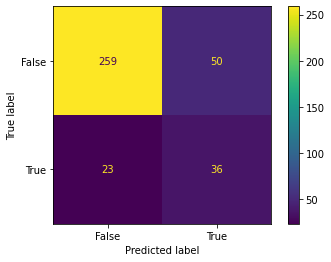

In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test)  
plt.show() 


### Learning curve
Learning and validation curves show the training and validation performance scores (here balanced accuracies) of an estimator (here "best_model") on the y-axis. A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over a varying hyper parameter. 

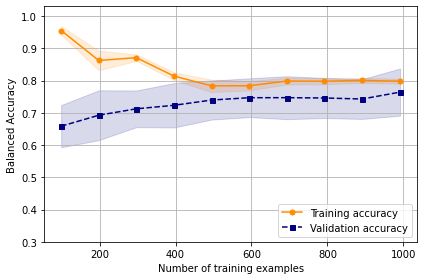

In [56]:
# Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=best_model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               scoring = 'balanced_accuracy',
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Balanced Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()

### ----  Summary ---- <a class="anchor" id="summary"></a>
In this problem we could deal with the data imbalance in different ways and boosted performance 25% compared to a dummy classifier and 15% compared to a baseline classifer that did not take the imbalance issue into account. We examined the learning curve to ensure the model is not suffering from overfitting.  

# Part 4 Deploy

In [75]:
# save the model
import pickle
import os
dest = os.path.join('attritionclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(best_model,
            open(os.path.join(dest, 'classifier.pkl'), 'wb'),
            protocol=4)